In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import NearestNeighbors

from pydataset import data

from mall_wrangle import wrangle_mall_df

In [2]:
df = data('iris')
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [3]:
new_col_names = []

for col in df.columns:
    new_col_names.append(col.lower().replace('.', '_'))
    
df.columns = new_col_names

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [4]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2)

In [5]:
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species
135,6.1,2.6,5.6,1.4,virginica
8,5.0,3.4,1.5,0.2,setosa
29,5.2,3.4,1.4,0.2,setosa
102,5.8,2.7,5.1,1.9,virginica
28,5.2,3.5,1.5,0.2,setosa


## Unscaled data

In [6]:
X = train[['sepal_length', 'sepal_width']]
X.head()

,sepal_length,sepal_width
135,6.1,2.6
8,5.0,3.4
29,5.2,3.4
102,5.8,2.7
28,5.2,3.5


In [7]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

clusters = kmeans.predict(X)
clusters

array([0, 1, 1, 0, 1, 0, 0, 1, 2, 0, 0, 2, 0, 0, 1, 0, 0, 1, 1, 1, 2, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 2, 2, 1, 0, 1, 1, 2, 0, 0, 2, 2, 2, 0,
       1, 1, 0, 0, 0, 2, 0, 2, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 0,
       1, 2, 0, 1, 2, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 2, 1, 0, 2, 2, 1, 1,
       1, 0, 0, 2, 0, 0, 0, 2, 1, 2, 1, 2, 0, 1, 1, 2, 2, 1, 0, 2, 1, 0,
       2, 1, 0, 1, 1, 0, 1, 0, 1, 0], dtype=int32)

In [8]:
train['cluster'] = clusters
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
135,6.1,2.6,5.6,1.4,virginica,0
8,5.0,3.4,1.5,0.2,setosa,1
29,5.2,3.4,1.4,0.2,setosa,1
102,5.8,2.7,5.1,1.9,virginica,0
28,5.2,3.5,1.5,0.2,setosa,1


In [9]:
train.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width,cluster
species,,,,,
setosa,4.962162,3.367568,1.445946,0.232432,1.00000
versicolor,5.946512,2.797674,4.281395,1.337209,0.44186
virginica,6.620000,2.975000,5.585000,2.015000,0.97500


[Text(0.5, 1.0, 'K-Means Clusters')]

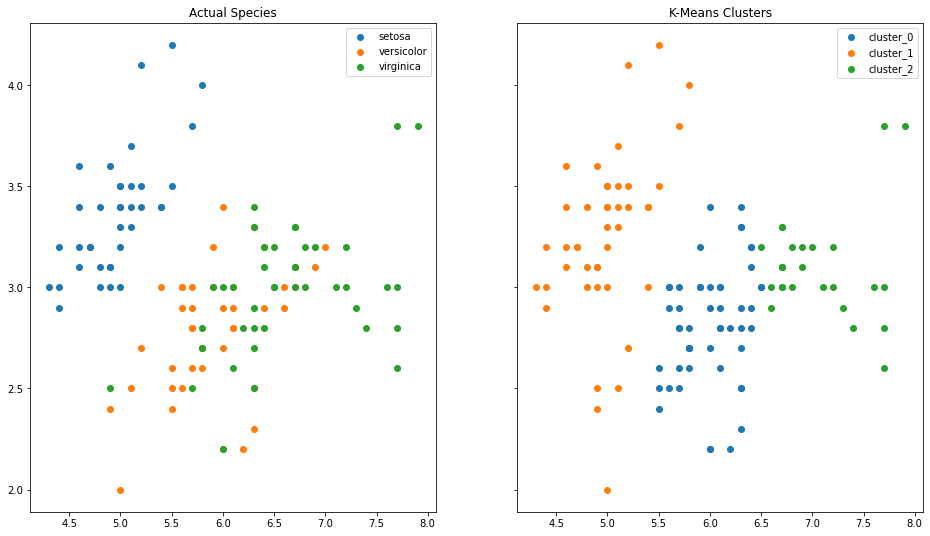

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(16, 9), sharex=True, sharey=True)

for species, subset in train.groupby('species'):
    axs[0].scatter(subset.sepal_length, subset.sepal_width, label=species)
    
axs[0].legend()
axs[0].set(title='Actual Species')
    
for cluster_n in train.cluster.sort_values().unique():
    axs[1].scatter(train[train.cluster == cluster_n].sepal_length, train[train.cluster == cluster_n].sepal_width, label=f'cluster_{cluster_n}')

axs[1].legend()
axs[1].set(title="K-Means Clusters")

Elbow method

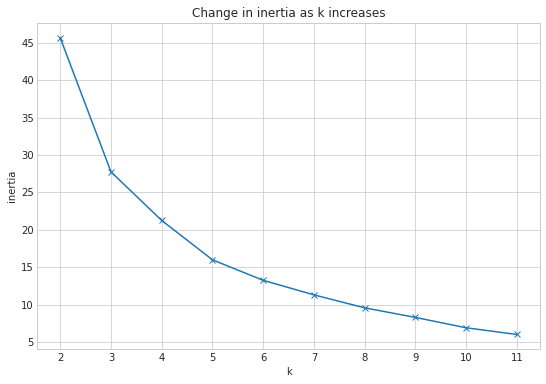

In [11]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

I will try 3 and 5 for K

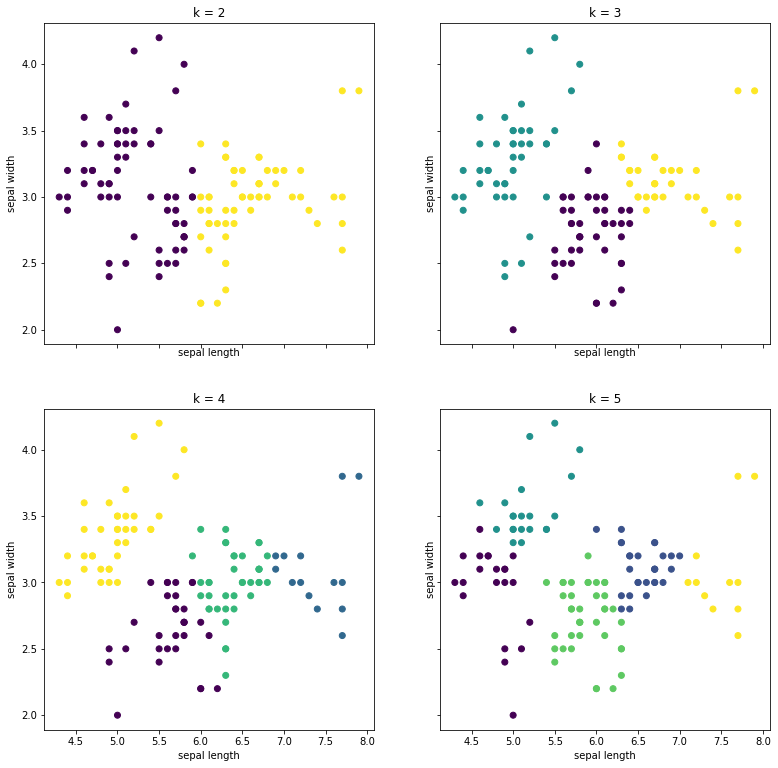

In [12]:
fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X).predict(X)
    ax.scatter(X.sepal_length, X.sepal_width, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='sepal length', ylabel='sepal width')

5 did not do very well so the best K is 3

## 3 features 

In [13]:
X = train[['sepal_length', 'sepal_width', 'petal_length']]
X.head()

,sepal_length,sepal_width,petal_length
135,6.1,2.6,5.6
8,5.0,3.4,1.5
29,5.2,3.4,1.4
102,5.8,2.7,5.1
28,5.2,3.5,1.5


In [14]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

clusters = kmeans.predict(X)
clusters

array([0, 1, 1, 2, 1, 0, 2, 1, 2, 0, 2, 0, 2, 2, 1, 2, 2, 1, 1, 2, 0, 0,
       2, 2, 1, 1, 2, 1, 2, 2, 2, 0, 0, 1, 2, 1, 1, 0, 2, 2, 2, 0, 0, 2,
       1, 1, 2, 0, 0, 0, 2, 0, 2, 2, 1, 0, 2, 2, 2, 2, 2, 1, 0, 1, 0, 2,
       1, 0, 2, 2, 0, 1, 2, 1, 1, 2, 1, 2, 0, 1, 1, 0, 1, 2, 0, 0, 1, 1,
       1, 2, 2, 0, 2, 2, 2, 0, 1, 0, 2, 0, 0, 1, 1, 2, 2, 2, 2, 0, 1, 2,
       0, 1, 2, 2, 1, 2, 1, 2, 1, 2], dtype=int32)

In [15]:
train['three_feature_cluster'] = clusters
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster,three_feature_cluster
135,6.1,2.6,5.6,1.4,virginica,0,0
8,5.0,3.4,1.5,0.2,setosa,1,1
29,5.2,3.4,1.4,0.2,setosa,1,1
102,5.8,2.7,5.1,1.9,virginica,0,2
28,5.2,3.5,1.5,0.2,setosa,1,1


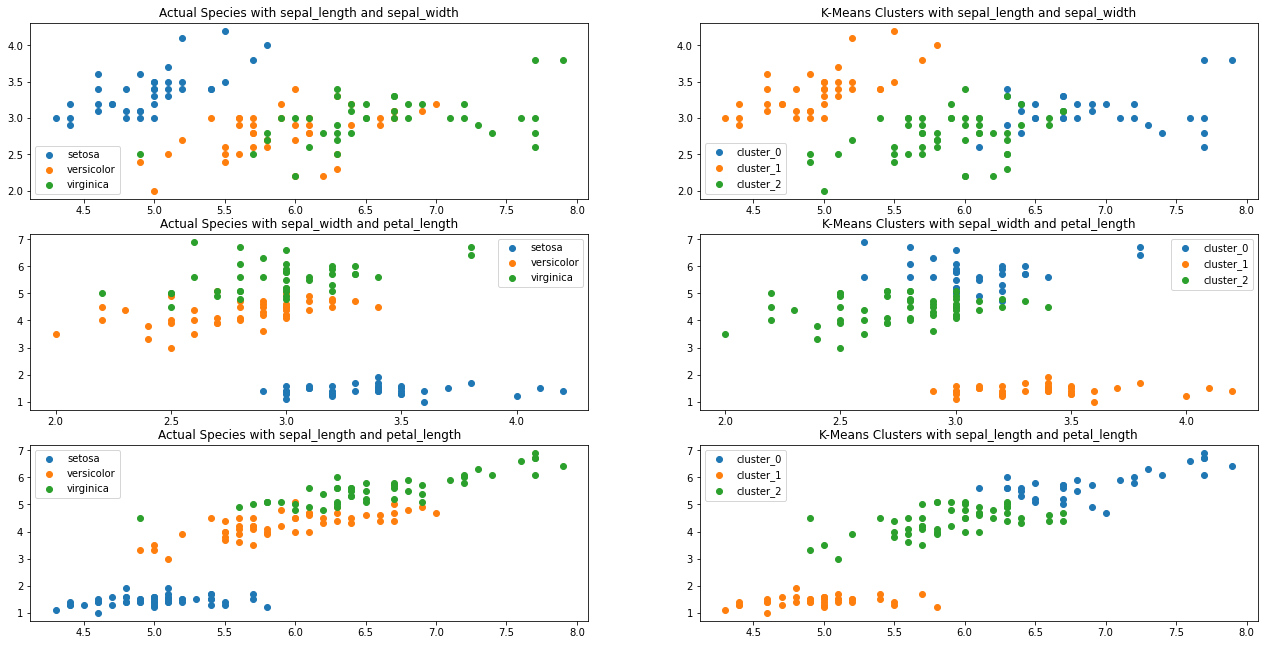

In [16]:
fig, axs = plt.subplots(3, 2, figsize=(22, 11))

for species, subset in train.groupby('species'):
    axs[0,0].scatter(subset.sepal_length, subset.sepal_width, label=species)
    
axs[0,0].legend()
axs[0,0].set(title='Actual Species with sepal_length and sepal_width')
    
for cluster_n in train.three_feature_cluster.sort_values().unique():
    axs[0,1].scatter(train[train.three_feature_cluster == cluster_n].sepal_length, train[train.three_feature_cluster == cluster_n].sepal_width, label=f'cluster_{cluster_n}')

axs[0,1].legend()
axs[0,1].set(title="K-Means Clusters with sepal_length and sepal_width")

for species, subset in train.groupby('species'):
    axs[1,0].scatter(subset.sepal_width, subset.petal_length, label=species)
    
axs[1,0].legend()
axs[1,0].set(title='Actual Species with sepal_width and petal_length')

for cluster_n in train.three_feature_cluster.sort_values().unique():
    axs[1,1].scatter(train[train.three_feature_cluster == cluster_n].sepal_width, train[train.three_feature_cluster == cluster_n].petal_length, label=f'cluster_{cluster_n}')

axs[1,1].legend()
axs[1,1].set(title="K-Means Clusters with sepal_width and petal_length")

for species, subset in df.groupby('species'):
    axs[2,0].scatter(subset.sepal_length, subset.petal_length, label=species)
    
axs[2,0].legend()
axs[2,0].set(title='Actual Species with sepal_length and petal_length')

for cluster_n in train.three_feature_cluster.sort_values().unique():
    axs[2,1].scatter(train[train.three_feature_cluster == cluster_n].sepal_length, train[train.three_feature_cluster == cluster_n].petal_length, label=f'cluster_{cluster_n}')

axs[2,1].legend()
axs[2,1].set(title="K-Means Clusters with sepal_length and petal_length")

plt.show()

## Scaled data

In [17]:
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster,three_feature_cluster
135,6.1,2.6,5.6,1.4,virginica,0,0
8,5.0,3.4,1.5,0.2,setosa,1,1
29,5.2,3.4,1.4,0.2,setosa,1,1
102,5.8,2.7,5.1,1.9,virginica,0,2
28,5.2,3.5,1.5,0.2,setosa,1,1


In [18]:
train2 = train.drop(columns=['cluster', 'three_feature_cluster', 'species']).copy() # make copy of train and drop columns we dont need

In [21]:
test2.head()

,sepal_length,sepal_width,petal_length,petal_width
77,6.8,2.8,4.8,1.4
122,5.6,2.8,4.9,2.0
82,5.5,2.4,3.7,1.0
6,5.4,3.9,1.7,0.4
11,5.4,3.7,1.5,0.2


In [20]:
test2 = test.drop(columns='species').copy() #drop species from test 

In [22]:
train2.head()

,sepal_length,sepal_width,petal_length,petal_width
135,6.1,2.6,5.6,1.4
8,5.0,3.4,1.5,0.2
29,5.2,3.4,1.4,0.2
102,5.8,2.7,5.1,1.9
28,5.2,3.5,1.5,0.2


In [23]:
# scale data

scaler = MinMaxScaler()

scaler.fit(train2)

train_scaled = scaler.transform(train2)
test_scaled = scaler.transform(test2)

train_scaled

array([[0.5       , 0.27272727, 0.77966102, 0.54166667],
       [0.19444444, 0.63636364, 0.08474576, 0.04166667],
       [0.25      , 0.63636364, 0.06779661, 0.04166667],
       [0.41666667, 0.31818182, 0.69491525, 0.75      ],
       [0.25      , 0.68181818, 0.08474576, 0.04166667],
       [0.61111111, 0.45454545, 0.71186441, 0.79166667],
       [0.38888889, 0.40909091, 0.54237288, 0.5       ],
       [0.33333333, 0.68181818, 0.05084746, 0.04166667],
       [0.66666667, 0.5       , 0.57627119, 0.54166667],
       [0.58333333, 0.54545455, 0.72881356, 0.91666667],
       [0.41666667, 0.36363636, 0.69491525, 0.95833333],
       [0.80555556, 0.45454545, 0.81355932, 0.625     ],
       [0.33333333, 0.27272727, 0.57627119, 0.45833333],
       [0.33333333, 0.18181818, 0.47457627, 0.41666667],
       [0.41666667, 0.90909091, 0.03389831, 0.04166667],
       [0.38888889, 0.45454545, 0.54237288, 0.45833333],
       [0.38888889, 0.27272727, 0.42372881, 0.375     ],
       [0.19444444, 0.68181818,

In [24]:
# put array into df

train_scaled = pd.DataFrame(train_scaled, columns=train2.columns.values).set_index([train2.index.values])

test_scaled = pd.DataFrame(test_scaled, columns=test2.columns.values).set_index([test2.index.values])

In [25]:
train_scaled.head()

,sepal_length,sepal_width,petal_length,petal_width
135,0.500000,0.272727,0.779661,0.541667
8,0.194444,0.636364,0.084746,0.041667
29,0.250000,0.636364,0.067797,0.041667
102,0.416667,0.318182,0.694915,0.750000
28,0.250000,0.681818,0.084746,0.041667


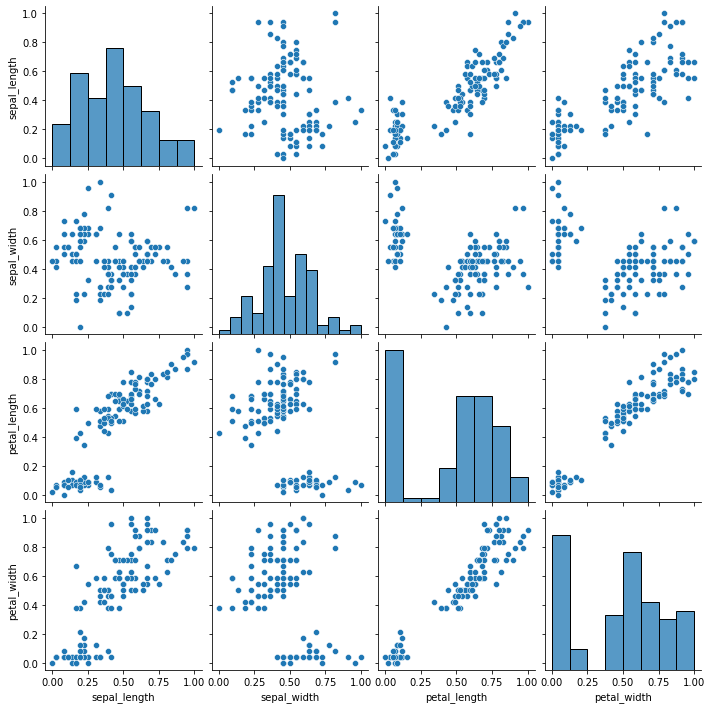

In [26]:
sns.pairplot(train_scaled)

In [27]:
X = train_scaled[['sepal_length', 'sepal_width']]
X.head()

,sepal_length,sepal_width
135,0.500000,0.272727
8,0.194444,0.636364
29,0.250000,0.636364
102,0.416667,0.318182
28,0.250000,0.681818


In [28]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

clusters = kmeans.predict(X)
clusters

array([0, 1, 1, 0, 1, 2, 0, 1, 2, 2, 0, 2, 0, 0, 1, 0, 0, 1, 1, 0, 2, 0,
       0, 2, 1, 1, 0, 1, 0, 0, 0, 2, 2, 1, 0, 1, 1, 2, 0, 0, 2, 2, 2, 0,
       1, 1, 0, 2, 2, 2, 0, 2, 0, 2, 1, 2, 0, 0, 0, 0, 0, 1, 2, 1, 2, 0,
       1, 2, 2, 0, 2, 1, 0, 1, 1, 0, 1, 2, 0, 1, 1, 2, 1, 0, 2, 2, 1, 1,
       1, 0, 0, 2, 0, 0, 0, 2, 1, 2, 0, 2, 2, 1, 1, 2, 2, 0, 0, 2, 1, 0,
       2, 1, 0, 0, 1, 0, 1, 0, 1, 0], dtype=int32)

In [29]:
train_scaled['cluster'] = clusters
train_scaled.head()

,sepal_length,sepal_width,petal_length,petal_width,cluster
135,0.500000,0.272727,0.779661,0.541667,0
8,0.194444,0.636364,0.084746,0.041667,1
29,0.250000,0.636364,0.067797,0.041667,1
102,0.416667,0.318182,0.694915,0.750000,0
28,0.250000,0.681818,0.084746,0.041667,1


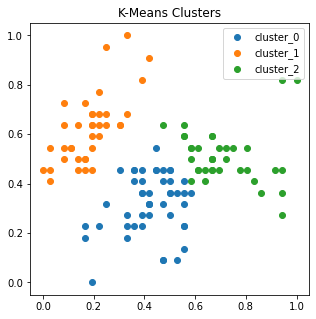

In [30]:
plt.figure(figsize=(5, 5))

for cluster_n in train_scaled.cluster.sort_values().unique():
    plt.scatter(train_scaled[train_scaled.cluster == cluster_n].sepal_length, 
                train_scaled[train_scaled.cluster == cluster_n].sepal_width, 
                label=f'cluster_{cluster_n}'
               )

plt.legend()
plt.title("K-Means Clusters")
plt.show()

Elbow method for unscaled data

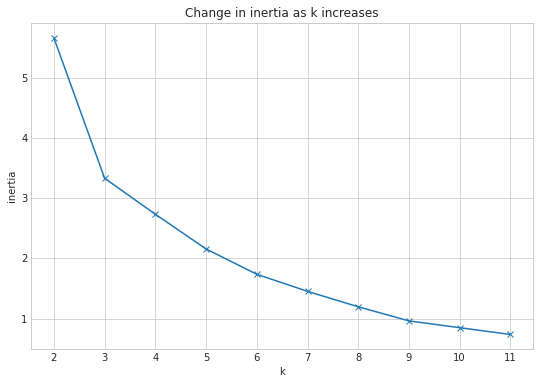

In [31]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

3 and 5 could possibly be used for K

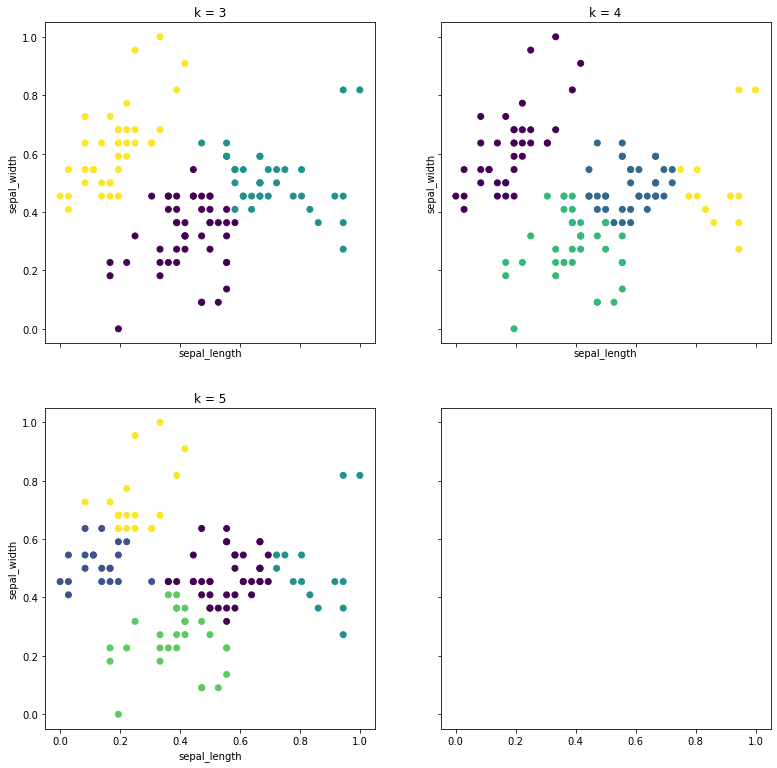

In [33]:
fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(3, 6)):
    clusters = KMeans(k).fit(X).predict(X)
    ax.scatter(X.sepal_length, X.sepal_width, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='sepal_length', ylabel='sepal_width')

Did scaling change the outcome?

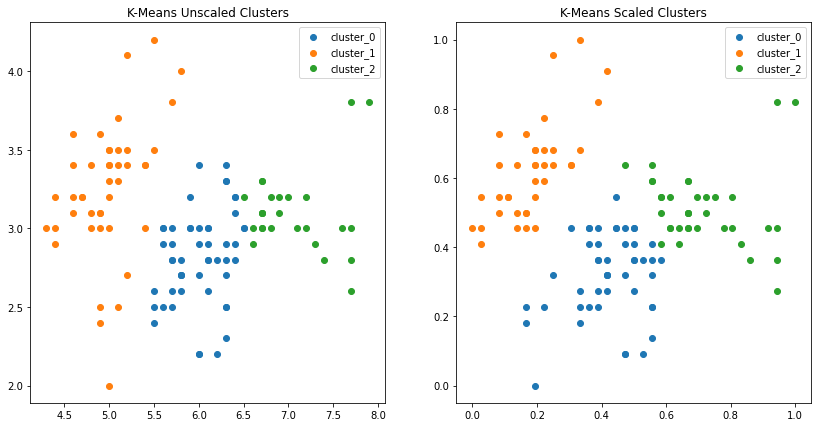

In [34]:
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

for cluster_n in train.cluster.sort_values().unique():
    axs[0].scatter(train[train.cluster == cluster_n].sepal_length, 
                train[train.cluster == cluster_n].sepal_width, 
                label=f'cluster_{cluster_n}'
               )
axs[0].legend()
axs[0].set(title="K-Means Unscaled Clusters")

for cluster_n in train_scaled.cluster.sort_values().unique():
    axs[1].scatter(train_scaled[train_scaled.cluster == cluster_n].sepal_length, 
                train_scaled[train_scaled.cluster == cluster_n].sepal_width, 
                label=f'cluster_{cluster_n}'
               )
axs[1].legend()
axs[1].set(title="K-Means Scaled Clusters")
plt.show()

scaling performed slightly better